HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  

make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd

import warnings
warnings.filterwarnings("ignore")

In [17]:
#Loading the data set
country_df = pd.read_csv("/Users/azharsharieff/Downloads/Country-data (1).csv")
country_df.head()
country_data_set = country_df

In [18]:
# understanding the data

print(country_df.shape)
print("--------------------------------------------------")
print(country_df.describe())
print("--------------------------------------------------")
print(country_df.info())

(167, 10)
--------------------------------------------------
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.0000

## Data Preparation

In [19]:
#variable transformation - convertig health as % of GDP to health per capita
country_df['health_spending_per_capita'] = ((country_df['health']*country_df['gdpp'])/100)
country_df = country_df.drop('health', axis =1)

In [20]:
#variable transformation - convertig export as % of GDP to export per capita

country_df['exports_per_capita'] = ((country_df['exports']*country_df['gdpp'])/100)
country_df = country_df.drop('exports', axis =1)

In [21]:
#variable transformation - convertig imports as % of GDP to imports per capita

country_df['imports_per_capita'] = ((country_df['imports']*country_df['gdpp'])/100)
country_df = country_df.drop('imports', axis =1)

In [22]:
# creating back up 
country_data = country_df

In [23]:
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,health_spending_per_capita,exports_per_capita,imports_per_capita
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,41.9174,55.30,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,267.8950,1145.20,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,185.9820,1712.64,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,100.6050,2199.19,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,735.6600,5551.00,7185.800


In [24]:
# checking for missing values
country_df.isnull().sum()

country                       0
child_mort                    0
income                        0
inflation                     0
life_expec                    0
total_fer                     0
gdpp                          0
health_spending_per_capita    0
exports_per_capita            0
imports_per_capita            0
dtype: int64

## Feature scaling

In [25]:
scaler = StandardScaler()

In [72]:
# creating data set with numerical variables
country_df_scaled = country_df[['child_mort','income','inflation','life_expec','total_fer','gdpp','health_spending_per_capita',
   'exports_per_capita','imports_per_capita']] 

In [73]:
country_df_scaled[['child_mort','income','inflation','life_expec','total_fer','gdpp','health_spending_per_capita',
   'exports_per_capita','imports_per_capita']] = scaler.fit_transform(country_df[['child_mort','income','inflation',
                                                                                'life_expec','total_fer','gdpp','health_spending_per_capita',
                                                                                'exports_per_capita','imports_per_capita']])
country_df_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,health_spending_per_capita,exports_per_capita,imports_per_capita
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.565040,-0.411011,-0.432276
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.439218,-0.350191,-0.313677
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.484826,-0.318526,-0.353720
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.532363,-0.291375,-0.345953
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.178771,-0.104331,0.040735


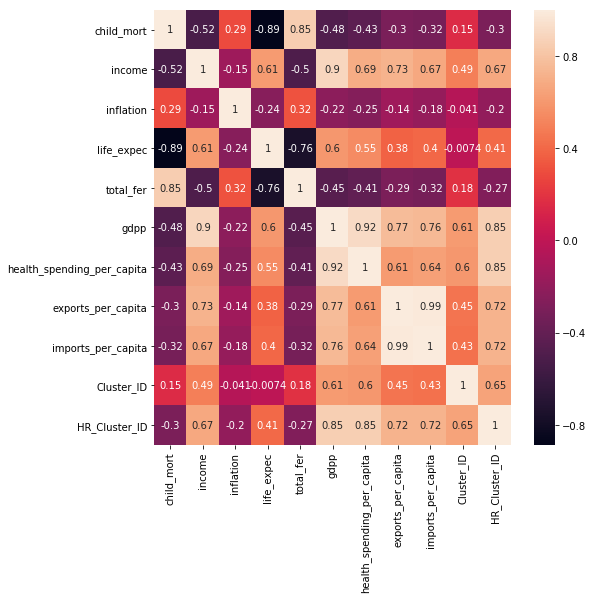

In [74]:
# corelation plot
plt.figure(figsize = (8,8))
sns.heatmap(country_df.corr(), annot = True)
plt.show()

## Performing PCA

In [75]:
from sklearn.decomposition import PCA
# performing PCA

pca = PCA(svd_solver = 'randomized',random_state = 42)
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [38]:
pca_df = pca.transform(country_df_scaled)

In [39]:
pca.components_

array([[-0.31639186,  0.38004113, -0.14308531,  0.34385651, -0.30284224,
         0.39998795,  0.358535  ,  0.34288671,  0.34486492],
       [ 0.47626735,  0.12838448,  0.22126089, -0.36981973,  0.4597152 ,
         0.2006241 ,  0.1550529 ,  0.39731091,  0.37078075],
       [-0.15001225,  0.14576421,  0.94841868,  0.19675173, -0.07783431,
         0.01033941, -0.07570322, -0.03057367, -0.07217386],
       [-0.14805195, -0.15480592, -0.00762798, -0.01839465, -0.21392805,
        -0.36477239, -0.59971228,  0.44942527,  0.46179779],
       [ 0.1019948 ,  0.79407469, -0.13642345, -0.15404105, -0.02033568,
         0.08750149, -0.49319984, -0.03853829, -0.2527867 ],
       [ 0.19658519, -0.03814681,  0.10840284, -0.58600986, -0.75390075,
         0.04538167,  0.18069888, -0.03891112, -0.01217988],
       [ 0.76126725, -0.02311312, -0.02207663,  0.58120846, -0.27314534,
        -0.04402264, -0.06461567, -0.01366973,  0.02718244],
       [ 0.00644411,  0.3938113 , -0.00607016,  0.002966  ,  0

In [40]:

colnames = list(country_df_scaled.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Features':colnames})
pca_df.head()

,PC1,PC2,Features
0,-0.316392,0.476267,child_mort
1,0.380041,0.128384,income
2,-0.143085,0.221261,inflation
3,0.343857,-0.369820,life_expec
4,-0.302842,0.459715,total_fer


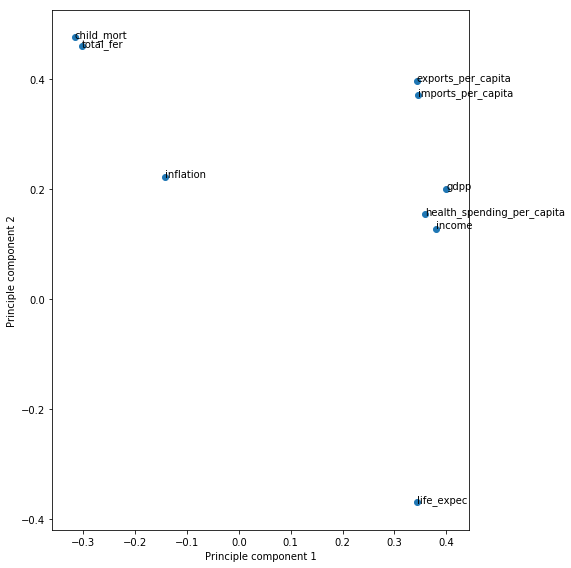

In [41]:
# ploting the principle components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')

for i, txt in enumerate(pca_df.Features):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [76]:
# variance explained by each PC
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

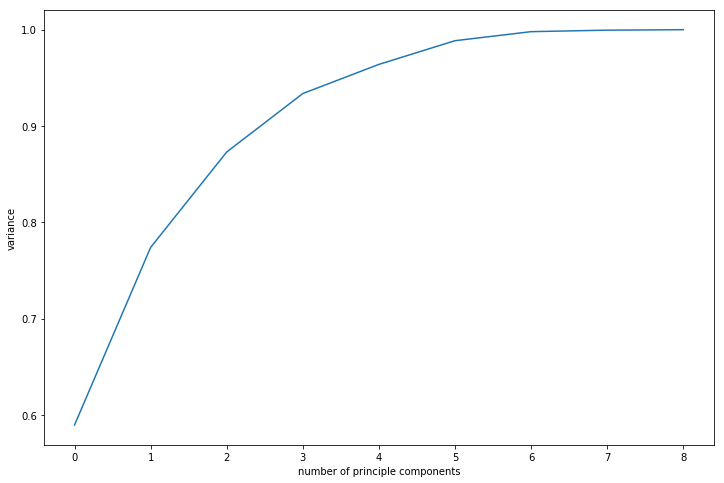

In [77]:
# scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of principle components")
plt.ylabel("variance")
plt.show()

from the scree plot the optimal number of Principal Components can be 4

In [45]:
from sklearn.decomposition import IncrementalPCA

In [80]:
# performing PCA with 4 principle components
pca_final = IncrementalPCA(n_components = 4)

In [81]:
pca_df_final = pca_final.fit_transform(country_df_scaled)
pca_df_final.shape

(167, 4)

In [82]:
# creating correlation matrix for the principle componets
corrmat = np.corrcoef(pca_df_final.transpose())

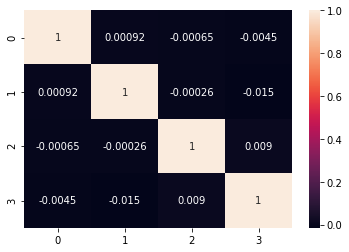

In [83]:
%matplotlib inline
sns.heatmap(corrmat, annot= True)
plt.show()

From the above heatmap,we notice that there is no correlation between principle components. 

## K-Means clustering

In [51]:
from sklearn.cluster import KMeans

[842.4238271354955, 551.7047401212994, 380.67187638395865, 307.14273548659185, 256.94283437792456, 208.6893045113537, 183.02407556742395]


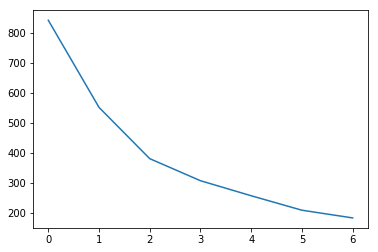

In [84]:
# elbow-curve / SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters , max_iter = 50)
    kmeans.fit(pca_df_final)
    
    ssd.append(kmeans.inertia_)

print(ssd)
# plot SSDs for each n_clusters
plt.plot(ssd)
plt.show()

From the above elbow curve, the optimal number of clusters we can have is 3.

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(pca_df_final)
    
    cluster_labels = kmeans.labels_
    # Silhouette score
    silhouette_avg = silhouette_score(pca_df_final,cluster_labels)
    print("For n_clusters = {0}, the Silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters = 2, the Silhouette score is 0.48686868639649855
For n_clusters = 3, the Silhouette score is 0.46706199059895176
For n_clusters = 4, the Silhouette score is 0.47659198665163294
For n_clusters = 5, the Silhouette score is 0.4787763605050636
For n_clusters = 6, the Silhouette score is 0.4009676339768897
For n_clusters = 7, the Silhouette score is 0.36975503075464544
For n_clusters = 8, the Silhouette score is 0.38399506287619484


In [106]:
# clustering with 3 clusters
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(pca_df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [107]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [108]:
# Assiging clusters to countries
country_data['Cluster_ID'] = kmeans.labels_

## Hierarchical clustering

In [109]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

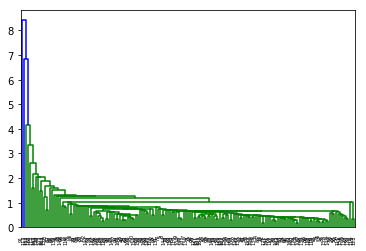

In [110]:
# single linkage
mergings = linkage(country_df_scaled, method = "single", metric = "euclidean")
dendrogram(mergings)
plt.show()

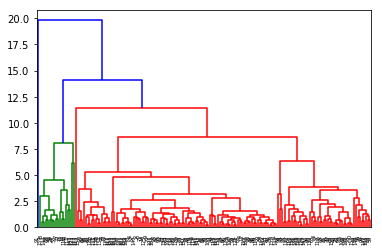

In [111]:
mergings = linkage(country_df_scaled, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [112]:
# Extracting 3 clusters
cluster_labels = cut_tree(mergings,n_clusters = 4).reshape(-1,)

In [113]:
country_df['HR_Cluster_ID'] = cluster_labels

In [114]:
country_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,health_spending_per_capita,exports_per_capita,imports_per_capita,Cluster_ID,HR_Cluster_ID
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.565040,-0.411011,-0.432276,0,0
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.439218,-0.350191,-0.313677,2,0
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.484826,-0.318526,-0.353720,2,0
3,Angola,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.532363,-0.291375,-0.345953,0,0
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.178771,-0.104331,0.040735,2,0


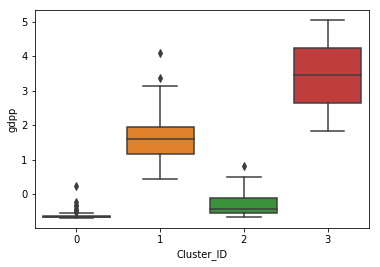

In [115]:

sns.boxplot(x = 'Cluster_ID', y = 'gdpp', data = country_df)
plt.show()

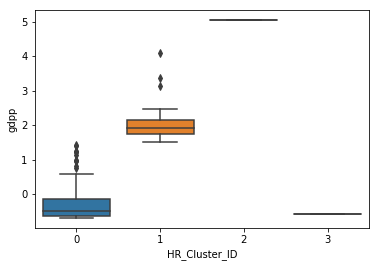

In [116]:
sns.boxplot(x = 'HR_Cluster_ID', y= 'gdpp', data = country_df)
plt.show()

The countries that fall under first and fourth cluster, have the least GDPP.

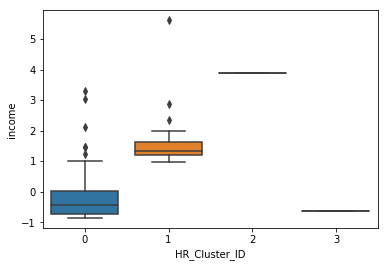

In [117]:
# Income

sns.boxplot(x = 'HR_Cluster_ID', y= 'income', data = country_df)
plt.show()

The countries that fall under first and fourth cluster, have the least Income.`

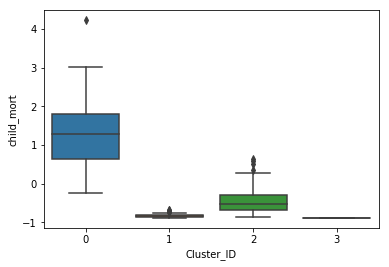

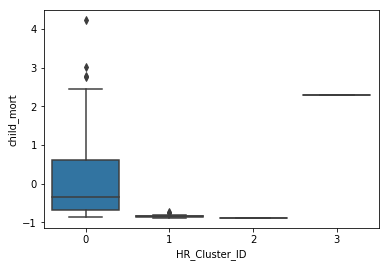

In [118]:
# child mortality

sns.boxplot(x = 'Cluster_ID', y = 'child_mort', data = country_df)
plt.show()

sns.boxplot(x = 'HR_Cluster_ID', y= 'child_mort', data = country_df)
plt.show()

The countries which fall under the first cluster have the highest child mortality rate.

In [119]:
# Extracting countries that fall under first cluster
countries_clus_1 = country_df[country_df['Cluster_ID'] == 0]
countries_clus_1.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,health_spending_per_capita,exports_per_capita,imports_per_capita,Cluster_ID,HR_Cluster_ID
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.565040,-0.411011,-0.432276,0,0
3,Angola,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.532363,-0.291375,-0.345953,0,0
17,Benin,1.808842,-0.797319,-0.654410,-0.987502,1.598107,-0.667961,-0.571075,-0.404030,-0.429979,0,0
21,Botswana,0.353908,-0.200033,0.107996,-1.517586,-0.045030,-0.361949,-0.294923,-0.259599,-0.227100,0,0
25,Burkina Faso,1.933196,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,-0.566801,-0.407937,-0.437600,0,0


In [120]:
countries = countries_clus_1.country
print(countries)

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [124]:
country_sort = countries_clus_1.sort_values(by = ['child_mort','income','gdpp'], ascending = True)

In [125]:
final_countries = country_sort.head()

In [126]:
final_countries

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,health_spending_per_capita,exports_per_capita,imports_per_capita,Cluster_ID,HR_Cluster_ID
136,Solomon Islands,-0.252936,-0.799401,-0.092213,-0.998780,0.856045,-0.638849,-0.526968,-0.378608,-0.377786,0,0
72,Iraq,-0.034074,-0.231250,0.836717,-0.378468,1.068063,-0.463187,-0.377662,-0.315157,-0.344580,0,0
21,Botswana,0.353908,-0.200033,0.107996,-1.517586,-0.045030,-0.361949,-0.294923,-0.259599,-0.227100,0,0
137,South Africa,0.383753,-0.267670,-0.135860,-1.833382,-0.237171,-0.311056,-0.226002,-0.297910,-0.313201,0,0
50,Eritrea,0.421059,-0.818131,0.362289,-0.998780,1.101191,-0.683065,-0.581240,-0.412809,-0.441548,0,0


The 5 countries which are dire need of help are: 
   1. Solomon Islands
   2. Iraq
   3. Botswana
   4. South Africa	
   5. Eritrea